# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [13]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [15]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [16]:
#your code here
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [17]:
#your code here
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [18]:
#your code here
spaceship.dropna(inplace=True)
spaceship.shape

(6606, 14)

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [19]:
#your code here
spaceship["Cabin"].unique()

spaceship["Cabin"] = spaceship["Cabin"].apply(lambda x: x.split("/")[0])
spaceship.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
8,0007_01,Earth,False,F,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
11,0008_03,Europa,False,B,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


- Drop PassengerId and Name

In [20]:
#your code here
spaceship.drop(columns = ["PassengerId","Name"], inplace=True)
spaceship.head(20)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
8,Earth,False,F,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True
11,Europa,False,B,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,True


- For non-numerical columns, do dummies.

In [21]:
#your code here
spaceship2 = spaceship.__deepcopy__()
spacedummies = pd.get_dummies(spaceship2, columns=['HomePlanet', 'Cabin', 'Destination'], drop_first=False)
spacedummies = pd.get_dummies(spacedummies, columns=['CryoSleep', 'VIP', 'Transported'], drop_first=True)

**Perform Train Test Split**

In [22]:
#your code here
target = spacedummies["Transported_True"]
features = spacedummies.drop("Transported_True", axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [24]:
#your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score

knn_reg = KNeighborsClassifier(n_neighbors=10)
knn_reg.fit(X_train, y_train)
pred = knn_reg.predict(X_test)

precision = precision_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7874432677760969
Precision: 0.8015873015873016
Recall: 0.7639939485627837


In [26]:
display(features.head(4))
features.columns

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_A,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,True,...,False,False,False,False,False,False,False,True,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CryoSleep_True', 'VIP_True'],
      dtype='object')

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

binary_features = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 
                  'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 
                  'Cabin_F', 'Cabin_G', 'Cabin_T', 
                  'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 
                  'Destination_TRAPPIST-1e', 'CryoSleep_True', 'VIP_True']

numerical_features = X_train.columns.difference(binary_features) # Identify numerical features

# Normalize only the numerical features
normalizer = MinMaxScaler()
normalizer.fit(X_train[numerical_features])

# Transform the numerical features
X_train_norm = normalizer.transform(X_train[numerical_features])
X_test_norm = normalizer.transform(X_test[numerical_features])

# Convert to DataFrame, keeping the original indices
X_train_norm = pd.DataFrame(X_train_norm, columns=numerical_features, index=X_train.index)
X_test_norm = pd.DataFrame(X_test_norm, columns=numerical_features, index=X_test.index)

# Combine normalized numerical features with unchanged binary features
X_train_final = pd.concat([X_train_norm, X_train[binary_features]], axis=1)
X_test_final = pd.concat([X_test_norm, X_test[binary_features]], axis=1)

In [30]:
knn_norm = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
knn_norm.fit(X_train_final, y_train)
knn_norm.score(X_test_final, y_test)

pred_norm = knn_norm.predict(X_test_final)

precision = precision_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7874432677760969
Precision: 0.8015873015873016
Recall: 0.7639939485627837


In [32]:
# With normalization
binary_features = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 
                  'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 
                  'Cabin_F', 'Cabin_G', 'Cabin_T', 
                  'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 
                  'Destination_TRAPPIST-1e', 'CryoSleep_True', 'VIP_True']

numerical_features = X_train.columns.difference(binary_features) # Identify numerical features

# Normalize only the numerical features
normalizer = StandardScaler()
normalizer.fit(X_train[numerical_features])

# Transform the numerical features
X_train_norm = normalizer.transform(X_train[numerical_features])
X_test_norm = normalizer.transform(X_test[numerical_features])

# Convert to DataFrame, keeping the original indices
X_train_norm = pd.DataFrame(X_train_norm, columns=numerical_features, index=X_train.index)
X_test_norm = pd.DataFrame(X_test_norm, columns=numerical_features, index=X_test.index)

# Combine normalized numerical features with unchanged binary features
X_train_final = pd.concat([X_train_norm, X_train[binary_features]], axis=1)
X_test_final = pd.concat([X_test_norm, X_test[binary_features]], axis=1)

In [34]:
knn_norm = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
knn_norm.fit(X_train_final, y_train)
knn_norm.score(X_test_final, y_test)

pred_norm = knn_norm.predict(X_test_final)

precision = precision_score(y_test, pred)

accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7874432677760969
Precision: 0.8015873015873016
Recall: 0.7639939485627837


In [ ]:
"""
Our model's performance is not good (R2 ~0.76 on plain and normalized samplesets, with a precision and recall around ~0.78-0.80)
Normalization show's little to no improvements.
"""

- Evaluate your model's performance. Comment it

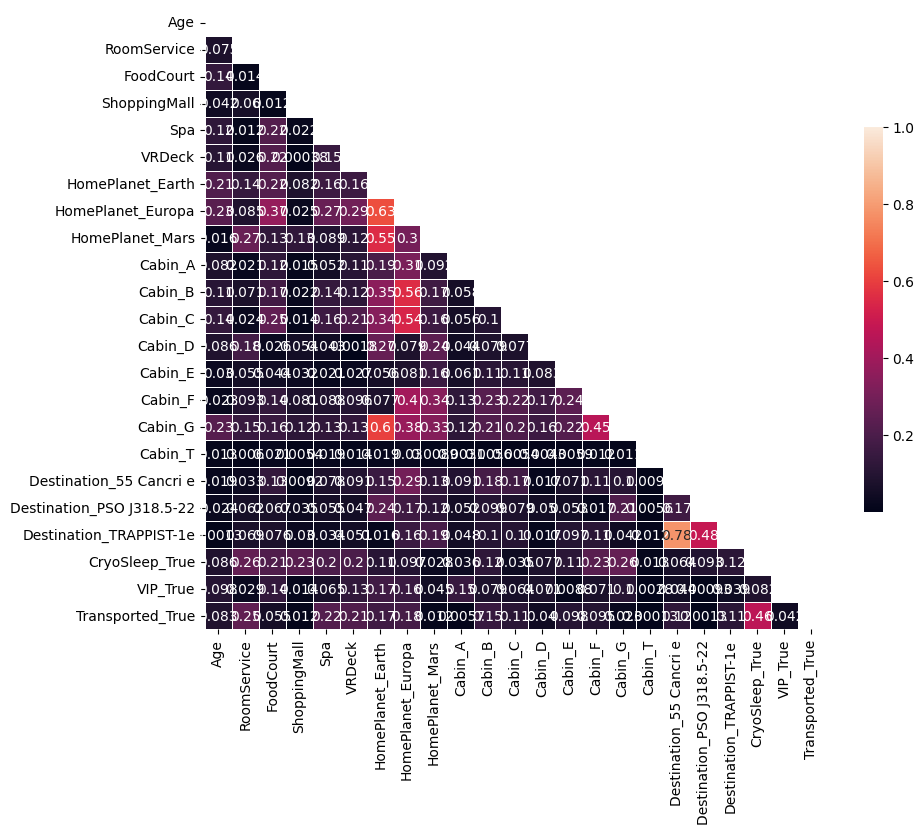

In [35]:
#your code here
#Evaluating co-relation between variables

import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

corr=np.abs(spacedummies.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

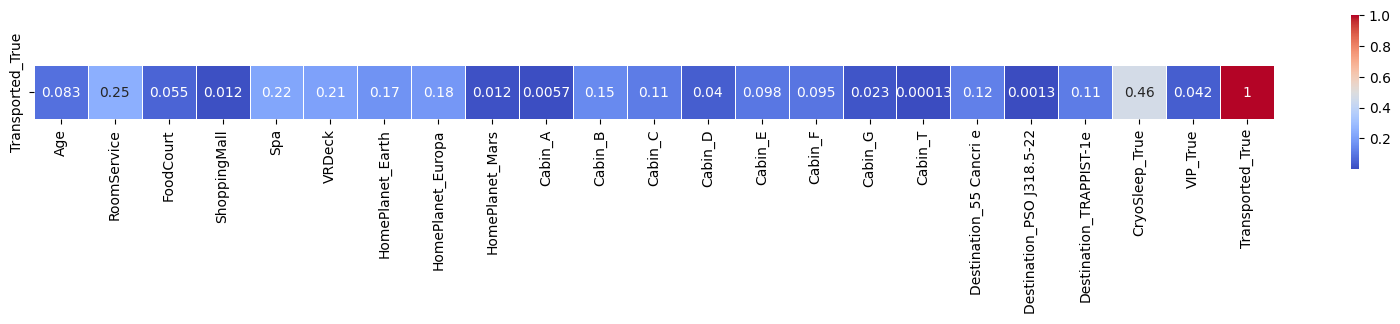

In [36]:
# Assuming spacedummies is already defined and contains your dummies
corr = np.abs(spacedummies.corr())

# Extract the correlation row for 'Transported_True'
transport_corr = corr.loc[['Transported_True']]  # Use double brackets to keep it as a DataFrame

# Set up the matplotlib figure
plt.figure(figsize=(20, 2))

# Draw the heatmap for the 'Transported_True' row
sns.heatmap(transport_corr, vmax=1, square=True, linewidths=.5,
            annot=True, cmap='coolwarm')

plt.show()

In [37]:
Conclusions:

Our R2-Score using KNN is not great (<0.8) even when normalizing data. Plotting correlation between variables shows some strange correlations (like between passengers from two different departure or arrival points) or some cabins and departure points (maybe reserved for passengers from there).

Analysing patterns between variables and Transported, there is no significative correlation to any variable, with the lowest being (Cabin_T, destination PSOJ318 and Cabin_A).

SyntaxError: invalid syntax (334633010.py, line 1)